Objectives:

1. Decide the thresholds that make sense for the classification of the new into:
    - No impact, the EURUSD exchange rate won´t be affected
    - High positive impact, with positive pips variation
    - High negative impact, with negative pips variation  
      
2. Does it make sense to split the data in different clusters using non-supervised techniques?

In [23]:
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

df = pd.read_csv('../data/curated/features_news_USD_pair_EURUSD_2007_2018.csv')

In [4]:
df.head(2)

,datetime_gmt,actual,country,datetime,forecast,forecast_error,impact,new,previous,previous_error,week,forecast_error_ratio,year,quarter,month,weekday,volatility_60_0_before,pips_agg_60_0_before,volatility_0_45_after,pips_agg_0_45_after,volatility_0_60_after,pips_agg_0_60_after,volatility_0_90_after,pips_agg_0_90_after,volatility_0_120_after,pips_agg_0_120_after,volatility_0_150_after,pips_agg_0_150_after,volatility_0_180_after,pips_agg_0_180_after,volatility_0_210_after,pips_agg_0_210_after,volatility_0_240_after,pips_agg_0_240_after,open_released,high_released,low_released,close_released,high_0_5_after,low_0_5_after,close_0_5_after,volatility_0_5_after,direction_candle_0_5_after,direction_agg_0_5_after,pips_agg_0_5_after,pips_candle_0_5_after,high_5_10_after,low_5_10_after,close_5_10_after,volatility_5_10_after,direction_candle_5_10_after,direction_agg_5_10_after,pips_agg_5_10_after,pips_candle_5_10_after,high_10_15_after,low_10_15_after,close_10_15_after,volatility_10_15_after,direction_candle_10_15_after,direction_agg_10_15_after,pips_agg_10_15_after,pips_candle_10_15_after,high_15_20_after,low_15_20_after,close_15_20_after,volatility_15_20_after,direction_candle_15_20_after,direction_agg_15_20_after,pips_agg_15_20_after,pips_candle_15_20_after,high_20_25_after,low_20_25_after,close_20_25_after,volatility_20_25_after,direction_candle_20_25_after,direction_agg_20_25_after,pips_agg_20_25_after,pips_candle_20_25_after,high_25_30_after,low_25_30_after,close_25_30_after,volatility_25_30_after,direction_candle_25_30_after,direction_agg_25_30_after,pips_agg_25_30_after,pips_candle_25_30_after,previous_value,previous_error_ratio,total_error_ratio,forecast_error_ratio_mean,forecast_error_ratio_std,forecast_error_ratio_zscore,total_error_ratio_mean,total_error_ratio_std,total_error_ratio_zscore
0,2007-01-08 20:00:00+00:00,12.3B,USD,2007-01-08 15:00:00,5.4B,better,Low,Consumer Credit m/m,-1.3B,accurate,2,127.78,2007,1,1,0,14,4,9,-2,9,-1,15,-1,18,3,21,5,23,8,23,8,32,18,13018,13020,13016,13018,13022,13016,13019,6,0,0,1,0,13020,13016,13017,4,0,0,-1,-2,13022,13013,13019,9,0,0,1,1,13021,13017,13020,4,0,0,2,2,13022,13016,13018,6,0,0,0,-2,13020,13015,13018,5,0,0,0,0,-1.3B,0.00,127.78,127.780,1.00000,0.00,127.780,1.000000,0.00
1,2007-02-07 20:00:00+00:00,6.0B,USD,2007-02-07 15:00:00,7.0B,worse,Low,Consumer Credit m/m,13.7B,better,6,-14.29,2007,1,2,2,15,-11,10,-2,11,5,16,7,16,7,16,7,17,6,17,9,23,14,13007,13008,13002,13005,13006,13003,13006,3,0,0,1,1,13010,13004,13005,6,0,0,0,0,13008,13003,13005,5,0,0,0,-2,13005,13001,13005,4,0,0,0,2,13005,13000,13002,5,0,0,-3,-3,13006,13001,13005,5,0,0,0,0,12.3B,11.38,-2.91,56.745,100.45866,-0.71,62.435,92.411785,-0.71


How many news were published from 2007 till 2018?

In [5]:
len(df)

9667

We will group all news by when they have been released

In [6]:
df.columns

Index(['datetime_gmt', 'actual', 'country', 'datetime', 'forecast', 'forecast_error', 'impact', 'new', 'previous', 'previous_error', 'week', 'forecast_error_ratio', 'year', 'quarter', 'month', 'weekday', 'volatility_60_0_before', 'pips_agg_60_0_before', 'volatility_0_45_after', 'pips_agg_0_45_after', 'volatility_0_60_after', 'pips_agg_0_60_after', 'volatility_0_90_after', 'pips_agg_0_90_after', 'volatility_0_120_after', 'pips_agg_0_120_after', 'volatility_0_150_after', 'pips_agg_0_150_after', 'volatility_0_180_after', 'pips_agg_0_180_after', 'volatility_0_210_after', 'pips_agg_0_210_after', 'volatility_0_240_after', 'pips_agg_0_240_after', 'open_released', 'high_released', 'low_released', 'close_released', 'high_0_5_after', 'low_0_5_after', 'close_0_5_after', 'volatility_0_5_after', 'direction_candle_0_5_after', 'direction_agg_0_5_after', 'pips_agg_0_5_after', 'pips_candle_0_5_after', 'high_5_10_after', 'low_5_10_after', 'close_5_10_after', 'volatility_5_10_after',
       'direction_ca

In [7]:
df_pips_by_datetime = df[['datetime_gmt','pips_agg_25_30_after', 'pips_agg_0_60_after','pips_agg_0_90_after','pips_agg_0_120_after',
                          'pips_agg_0_150_after','pips_agg_0_180_after','pips_agg_0_210_after','pips_agg_0_240_after']]

In [8]:
df_pips_by_datetime.head(2)

,datetime_gmt,pips_agg_25_30_after,pips_agg_0_60_after,pips_agg_0_90_after,pips_agg_0_120_after,pips_agg_0_150_after,pips_agg_0_180_after,pips_agg_0_210_after,pips_agg_0_240_after
0,2007-01-08 20:00:00+00:00,0,-1,-1,3,5,8,8,18
1,2007-02-07 20:00:00+00:00,0,5,7,7,7,6,9,14


How many datapoints do we have?

In [9]:
len(df_pips_by_datetime)

9667

In [10]:
df_pips_by_datetime = df_pips_by_datetime.groupby('datetime_gmt', as_index=False).first()


In [11]:
len(df_pips_by_datetime)

6362

In [12]:
df_pips_by_datetime.head(2)

,datetime_gmt,pips_agg_25_30_after,pips_agg_0_60_after,pips_agg_0_90_after,pips_agg_0_120_after,pips_agg_0_150_after,pips_agg_0_180_after,pips_agg_0_210_after,pips_agg_0_240_after
0,2007-01-08 20:00:00+00:00,0,-1,-1,3,5,8,8,18
1,2007-01-09 15:00:00+00:00,5,-3,-3,-11,0,11,7,6


In [13]:
columns = df_pips_by_datetime.columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002438720A748>,
      dtype=object)

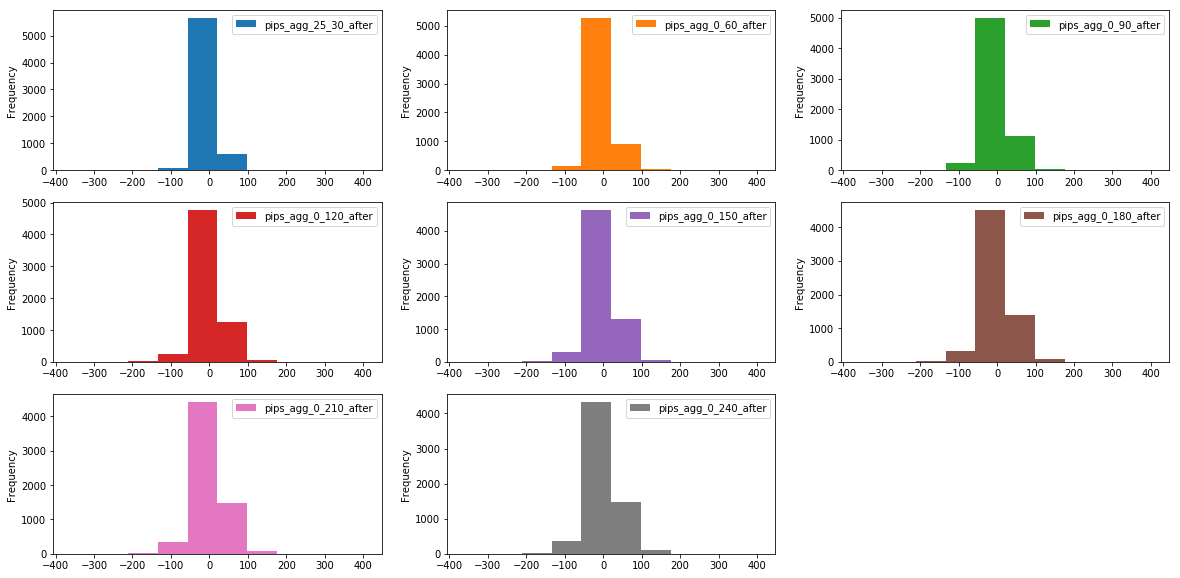

In [15]:
df_pips_by_datetime[columns[1:]].plot(kind='hist', subplots=True, sharex=False, layout=(3,3),figsize=(20,10))

The expected correlation seems to be there. 
Whatever pattern is observed after 30 minutes is reproduced after 4h, although pips increments/decrements seems to be higher


In [17]:
df_pips_by_datetime.describe()

,pips_agg_25_30_after,pips_agg_0_60_after,pips_agg_0_90_after,pips_agg_0_120_after,pips_agg_0_150_after,pips_agg_0_180_after,pips_agg_0_210_after,pips_agg_0_240_after
count,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000,6362.000000
mean,-0.130305,-0.055486,-0.112700,0.249607,0.157026,0.542754,0.826941,0.964005
std,21.080053,26.256949,30.638672,34.442841,36.488140,38.373103,40.303905,42.297638
min,-164.000000,-184.000000,-220.000000,-229.000000,-199.000000,-306.000000,-337.000000,-367.000000
25%,-9.000000,-11.000000,-14.000000,-15.000000,-16.000000,-17.000000,-18.000000,-19.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,12.000000,14.000000,16.000000,17.000000,18.000000,20.000000,21.000000
max,294.000000,354.000000,331.000000,381.000000,366.000000,371.000000,409.000000,383.000000


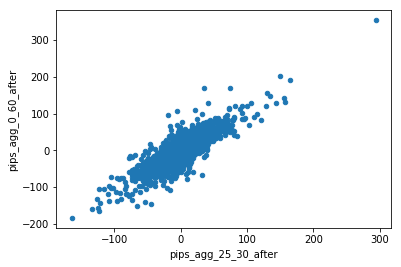

In [18]:
df_pips_by_datetime.plot.scatter(x='pips_agg_25_30_after', y='pips_agg_0_60_after')

In [27]:
from scipy import stats

In [29]:
stats.zscore([-2,2,2,-2,], axis=0, ddof=0)



array([-1.,  1.,  1., -1.])

In [35]:
a = np.array([1, 2, 3, 4, 5, 6, 7])
np.percentile(a, 75)

5.5